In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [235]:
from PIL import Image
import numpy as np
import os, shutil
from sklearn.model_selection import train_test_split

from keras import layers
from keras import models
from keras import optimizers

import pickle
import tensorflow as tf

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
os.getcwd()

'/Users/irenefontperadejordi/Documents/DOCUMENTS/UNIVERSITAT/TILBURG - MASTER/Bloc 3/Deep Learning/Final Paper'

## Name the documents corrently - DO NOT RUN!

In [5]:
def mainwhite(): 
    i = 0
    for filename in os.listdir("/Users/irenefontperadejordi/Documents/DOCUMENTS/UNIVERSITAT/TILBURG - MASTER/Bloc 3/Deep Learning/Final Paper/FacePlace - CMU edited 2/White"): 
        dst ="white" + str(i) + ".jpg"
        src ='/Users/irenefontperadejordi/Documents/DOCUMENTS/UNIVERSITAT/TILBURG - MASTER/Bloc 3/Deep Learning/Final Paper/FacePlace - CMU edited 2/White/'+ filename 
        dst ='/Users/irenefontperadejordi/Documents/DOCUMENTS/UNIVERSITAT/TILBURG - MASTER/Bloc 3/Deep Learning/Final Paper/FacePlace - CMU edited 2/White/'+ dst 
    
        os.rename(src, dst) 
        i += 1
  
# Driver Code 
if __name__ == '__main__': 
      
    # Calling main() function 
    mainwhite() 

In [6]:
def mainblack(): 
    i = 0
    for filename in os.listdir("/Users/irenefontperadejordi/Documents/DOCUMENTS/UNIVERSITAT/TILBURG - MASTER/Bloc 3/Deep Learning/Final Paper/FacePlace - CMU edited 2/Black/"): 
        dst ="black" + str(i) + ".jpg"
        src ='/Users/irenefontperadejordi/Documents/DOCUMENTS/UNIVERSITAT/TILBURG - MASTER/Bloc 3/Deep Learning/Final Paper/FacePlace - CMU edited 2/Black/'+ filename 
        dst ='/Users/irenefontperadejordi/Documents/DOCUMENTS/UNIVERSITAT/TILBURG - MASTER/Bloc 3/Deep Learning/Final Paper/FacePlace - CMU edited 2/Black/'+ dst
    
        os.rename(src, dst) 
        i += 1
  
# Driver Code 
if __name__ == '__main__': 
      
    # Calling main() function 
    mainblack() 

## Put the images into an array

#### Black images into an array

In [3]:
black = []
for i in range(936):
    black.append(np.array(Image.open('/Users/irenefontperadejordi/Documents/DOCUMENTS/UNIVERSITAT/TILBURG - MASTER/Bloc 3/Deep Learning/Final Paper/FacePlace - CMU edited 2/Black/black{}.jpg'.format(i))))

In [4]:
np_black = np.array(black)

In [5]:
np_black.shape

(936, 250, 250, 3)

#### White images into an array

In [6]:
white = []
for i in range(936):
    white.append(np.array(Image.open('/Users/irenefontperadejordi/Documents/DOCUMENTS/UNIVERSITAT/TILBURG - MASTER/Bloc 3/Deep Learning/Final Paper/FacePlace - CMU edited 2/White/white{}.jpg'.format(i))))

In [7]:
np_white = np.array(white)

In [8]:
np_white.shape

(936, 250, 250, 3)

#### Creating x (data all together) and y (labels)

In [9]:
x_train_complete = np.vstack((np_black,np_white))

In [10]:
x_train_complete.shape

(1872, 250, 250, 3)

In [59]:
y_train_black = np.zeros(len(np_black))

In [60]:
y_train_white = np.ones(len(np_white))

In [61]:
y_train_complete = np.hstack((y_train_black, y_train_white))

In [62]:
y_train_complete.shape

(1872,)

##### Data split

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train_complete, y_train_complete, test_size=0.2, random_state=1)


In [16]:
print("X Train set shape:", x_train.shape)
print("Y Train set shape:", y_train.shape)
print("X Vallidation set shape:", x_val.shape)
print("X Validation set shape:", y_val.shape)

X Train set shape: (1497, 250, 250, 3)
Y Train set shape: (1497,)
X Vallidation set shape: (375, 250, 250, 3)
X Validation set shape: (375,)


In [17]:
x_train_normalized = x_train.astype('float32') / 255
x_val_normalized = x_val.astype('float32') / 255

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 59, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 64)        36928     
__________

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [21]:
model.fit(x_train_normalized, y_train, epochs=5, batch_size=64)

Epoch 1/5
1497/1497 [==============================] - 248s 166ms/step - loss: 0.4719 - acc: 0.7796
Epoch 2/5
1497/1497 [==============================] - 202s 135ms/step - loss: 0.3134 - acc: 0.8751
Epoch 3/5
1497/1497 [==============================] - 209s 140ms/step - loss: 0.2468 - acc: 0.9038
Epoch 4/5
1497/1497 [==============================] - 200s 133ms/step - loss: 0.2247 - acc: 0.9118
Epoch 5/5
1497/1497 [==============================] - 223s 149ms/step - loss: 0.1846 - acc: 0.9265


In [22]:
test_loss, test_acc = model.evaluate(x_val_normalized, y_val)

375/375 [==============================] - 15s 40ms/step


In [23]:
test_acc

0.9546666649182638

In [24]:
test_loss

0.14363007736206054

### Saving the model

In [27]:
# Saving the model (https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)
pickle.dump(model, open("finalized_CNN_model.sav", "wb"))

In [28]:
# importing the model
loaded_model = pickle.load(open("finalized_CNN_model.sav","rb"))

#result = loaded_model.score(X_test, Y_test)
#print(result)

## Analyzing wrongly classified examples

In [33]:
predictions = loaded_model.predict(x_val_normalized)

In [35]:
binary_pred = []

for i in range(len(predictions)):
    if predictions[i] > 0.5:
        binary_pred.append(1)
    else:
        binary_pred.append(0)
        
binary_pred = np.array(binary_pred)

In [40]:
n_of_wrong = 0

for i in range(len(y_val)):
    if binary_pred[i] != y_val[i]:
        n_of_wrong+=1

In [161]:
wrong_id = []

for i in range(len(y_val)):
    if binary_pred[i] != y_val[i]:
        wrong_id.append(i) 

print("Number of examples wrongly classified:", len(wrong_id))
print("IDs wrongly classified:", wrong_id) #these are the number of the x_val predicted wrong

Number of examples wrongly classified: 17
IDs wrongly classified: [40, 67, 94, 97, 156, 202, 205, 210, 233, 246, 267, 311, 315, 348, 359, 360, 370]


### Check the pictures that are wrong

correct label: 0.0
predict label: 1
confidence: [0.8179534]


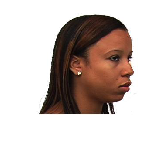

correct label: 0.0
predict label: 1
confidence: [0.96293396]


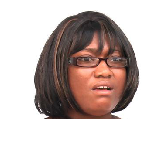

correct label: 0.0
predict label: 1
confidence: [0.75182676]


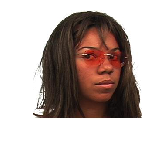

correct label: 0.0
predict label: 1
confidence: [0.90215266]


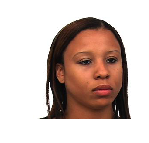

correct label: 0.0
predict label: 1
confidence: [0.8953567]


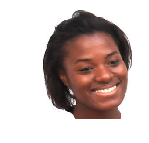

correct label: 0.0
predict label: 1
confidence: [0.88041943]


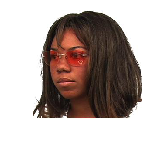

correct label: 0.0
predict label: 1
confidence: [0.81755704]


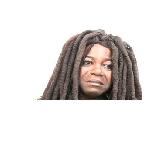

correct label: 0.0
predict label: 1
confidence: [0.8718867]


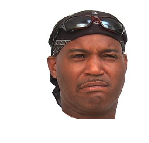

correct label: 0.0
predict label: 1
confidence: [0.50606936]


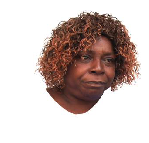

correct label: 0.0
predict label: 1
confidence: [0.66886765]


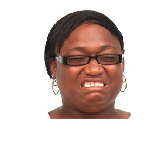

correct label: 0.0
predict label: 1
confidence: [0.86983275]


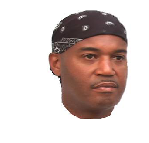

correct label: 0.0
predict label: 1
confidence: [0.72051394]


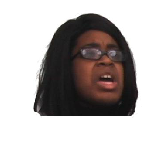

correct label: 0.0
predict label: 1
confidence: [0.7873043]


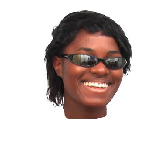

correct label: 0.0
predict label: 1
confidence: [0.5138965]


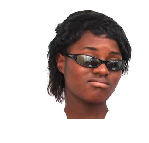

correct label: 0.0
predict label: 1
confidence: [0.9662929]


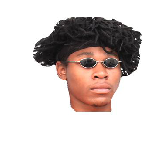

correct label: 1.0
predict label: 0
confidence: [0.19801037]


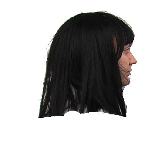

correct label: 0.0
predict label: 1
confidence: [0.6367708]


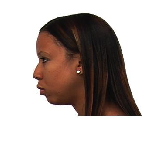

In [163]:
for i in wrong_id:
    print("correct label:", y_val[i])
    print("predict label:", binary_pred[i])
    print("confidence:", predictions[i])
    plt.figure(figsize=(2,2))
    plt.axis("off")
    plt.imshow(x_val[i])
    plt.show()

In [175]:
pred_white = 0
pred_black = 0

for i in range(len(binary_pred)):
    if binary_pred[i] == 1:
        pred_white +=1
    else:
        pred_black +=1

real_white = 0
real_black = 0

for i in range(len(y_val)):
    if y_val[i] == 1:
        real_white +=1
    else:
        real_black +=1
        
print("Images predicted as white", pred_white)
print("Number of real white images", real_white)
print("______________________________________")
print("Images predicted as black", pred_black)
print("Number of real black images", real_black)

Images predicted as white 195
Number of real white images 180
______________________________________
Images predicted as black 180
Number of real black images 195


### Predictions distribution

In [226]:
black_pred = []
white_pred = []

for i in range(len(y_val)):
    if y_val[i] == 1:
        white_pred.append(predictions[i])
    else:
        black_pred.append(predictions[i])
    

In [227]:
print(np.around(np.max(black_pred), decimals = 3))
print(np.around(np.min(black_pred), decimals = 3))
print(np.around(np.max(white_pred), decimals = 3))
print(np.around(np.min(white_pred), decimals = 3))

0.966
0.0
0.999
0.198


In [232]:
np.histogram(black_pred)

(array([144,  13,   7,  11,   4,   2,   2,   2,   3,   7]),
 array([5.0505190e-05, 9.6674748e-02, 1.9329898e-01, 2.8992322e-01,
        3.8654748e-01, 4.8317170e-01, 5.7979596e-01, 6.7642021e-01,
        7.7304441e-01, 8.6966866e-01, 9.6629292e-01], dtype=float32))

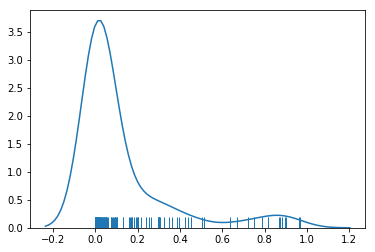

In [236]:
sns.distplot(black_pred, hist=False, rug=True);

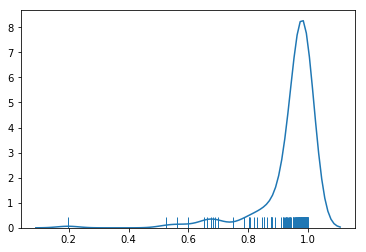

In [237]:
sns.distplot(white_pred, hist=False, rug=True);